In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,SpectralClustering,AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram
import requests
import urllib

In [2]:
from scipy.io import matlab
mpl.rcParams.update({'font.size':16})

In [3]:
import csv

In [4]:
df_Exp= pd.read_csv('Expression.csv',header=None)
df_Col= pd.read_csv('Columns.csv')

In [5]:
n1=sum(df_Col['donor_age']=='24 years')
n2=sum(df_Col['donor_age']=='39 years')
n3=sum(df_Col['donor_age']=='57 years')
n4=sum(df_Col['donor_age']=='31 years')
n5=sum(df_Col['donor_age']=='49 years')
n6=sum(df_Col['donor_age']=='55 years')

In [6]:
mri=df_Col[['sample_mri_0','sample_mri_1','sample_mri_2']]
mri.loc[0:169,].head()

,sample_mri_0,sample_mri_1,sample_mri_2
0,74,96,29
1,129,78,81
2,85,96,19
3,94,102,26
4,145,75,66


In [7]:
df_Exp.shape

(1149, 1015)

In [8]:
df_Exp.head()

,0,1,2,3,4,5,6,7,8,9,...,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014
0,1028929,0.1150,-1.3842,-1.0551,-0.9893,-1.7035,-0.9614,-1.3971,-0.4980,-0.6459,...,1.5734,NaN,0.8803,0.9659,0.0952,1.1117,0.6702,0.6888,NaN,1.9745
1,1028930,0.1784,-0.9596,-0.4368,-0.6208,-0.7292,-0.4656,-0.6787,-0.1755,-0.3677,...,-0.2166,NaN,0.3736,0.5566,-0.0743,0.9830,-0.0236,0.4204,NaN,1.8188
2,1048348,-1.2555,0.1153,-1.3502,-1.0959,-0.9251,-2.0005,-1.0678,-0.5743,-0.5930,...,-0.4613,NaN,0.0338,-0.5328,-0.0354,0.0003,-1.3600,0.4436,NaN,-1.0792
3,1048598,-0.8958,-0.4182,-0.7309,-0.6972,-0.6229,-0.6526,-0.7663,-0.9629,-0.7028,...,3.1060,NaN,1.5451,2.0047,0.7505,1.3084,2.0124,-0.0612,NaN,-1.0464
4,1048599,-0.8652,-0.4883,-0.7515,-0.6895,-0.6236,-0.5144,-0.6476,-0.7797,-0.7233,...,2.8474,NaN,1.3824,2.0222,0.5386,1.2299,2.0091,-0.2492,NaN,-0.9855


In [9]:
df_Col.shape

(1014, 17)

In [10]:
struct=df_Col['structure_name']

In [11]:
struct.loc[0]

'anterior orbital gyrus'

In [12]:
struct.loc[-1] = 'Probe ID'  # adding a row 
struct.index=struct.index+1 # shifting index
struct=struct.sort_index() #sorting it back

In [13]:
struct.head()

0                  Probe ID
1    anterior orbital gyrus
2         frontal operculum
3              frontal pole
4              gyrus rectus
Name: structure_name, dtype: object

In [14]:
df_Exp.columns=struct

In [15]:
df_Exp=df_Exp.set_index('Probe ID')

In [16]:
df_Exp.shape

(1149, 1014)

In [17]:
df_Exp

structure_name,anterior orbital gyrus,frontal operculum,frontal pole,gyrus rectus,"inferior frontal gyrus, opercular part","inferior frontal gyrus, orbital part","inferior frontal gyrus, triangular part",inferior rostral gyrus,lateral orbital gyrus,medial orbital gyrus,...,inferior olivary complex,central medullary reticular group,gigantocellular group,lateral medullary reticular group,raphe nuclei of medulla,spinal trigeminal nucleus,vestibular nuclei,corpus callosum,cingulum bundle,choroid plexus of the lateral ventricle
Probe ID,,,,,,,,,,,,,,,,,,,,,
1028929,0.1150,-1.3842,-1.0551,-0.9893,-1.7035,-0.9614,-1.3971,-0.4980,-0.6459,-1.2131,...,1.5734,NaN,0.8803,0.9659,0.0952,1.1117,0.6702,0.6888,NaN,1.9745
1028930,0.1784,-0.9596,-0.4368,-0.6208,-0.7292,-0.4656,-0.6787,-0.1755,-0.3677,-0.6669,...,-0.2166,NaN,0.3736,0.5566,-0.0743,0.9830,-0.0236,0.4204,NaN,1.8188
1048348,-1.2555,0.1153,-1.3502,-1.0959,-0.9251,-2.0005,-1.0678,-0.5743,-0.5930,0.5011,...,-0.4613,NaN,0.0338,-0.5328,-0.0354,0.0003,-1.3600,0.4436,NaN,-1.0792
1048598,-0.8958,-0.4182,-0.7309,-0.6972,-0.6229,-0.6526,-0.7663,-0.9629,-0.7028,-0.8398,...,3.1060,NaN,1.5451,2.0047,0.7505,1.3084,2.0124,-0.0612,NaN,-1.0464
1048599,-0.8652,-0.4883,-0.7515,-0.6895,-0.6236,-0.5144,-0.6476,-0.7797,-0.7233,-0.8038,...,2.8474,NaN,1.3824,2.0222,0.5386,1.2299,2.0091,-0.2492,NaN,-0.9855
1015836,-0.8298,-0.0950,-0.4425,-0.4124,0.0442,-0.1395,-0.1408,-0.6782,-0.7766,-0.4450,...,-1.5570,NaN,0.2114,1.0990,-0.6473,0.4441,0.4970,-6.8726,NaN,-5.8911
1014329,-0.5900,-0.1551,-0.2279,-0.8431,-0.8304,-1.0765,0.0504,-0.2687,-1.1017,-0.6708,...,-2.5322,NaN,0.9168,-2.6349,0.4840,-1.0798,0.6779,-0.1467,NaN,-1.3697
1014097,-3.5345,0.1876,-0.6941,-0.3534,0.0172,-0.0207,0.1645,0.3975,-0.7068,0.1132,...,1.5446,NaN,0.6101,1.7434,-0.2362,0.9698,1.1864,-1.3334,NaN,0.0278
1039920,0.8926,1.0586,1.4108,1.1845,1.5062,1.3431,1.5870,1.4093,1.0954,1.3493,...,0.7956,NaN,0.4823,-0.4046,0.0908,1.0388,0.3182,-2.0642,NaN,-1.7448


In [18]:
df1=df_Exp.iloc[:,0:169].dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
df2=df_Exp.iloc[:,169:338].dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
df3=df_Exp.iloc[:,338:507].dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
df4=df_Exp.iloc[:,507:676].dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
df5=df_Exp.iloc[:,676:845].dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)
df6=df_Exp.iloc[:,845:1014].dropna(axis=1, how='any', thresh=None, subset=None, inplace=False)

In [19]:
def summarize(info,name,quiet=False):
    values = info[name]
    if not quiet:
        print(values.round(2))
    plt.pcolor(values,cmap='RdBu_r',vmin=-values.max(),vmax=values.max())
    raynge = np.arange(values.shape[0])
    if not quiet:
        plt.xticks(raynge+0.5,raynge)
        plt.yticks(raynge+0.5,raynge)
    else:
        plt.xticks([])
        plt.yticks([])
    plt.gca().invert_yaxis() # Make y-axis go from low to high like a matrix
    plt.colorbar().set_label(name)
    eigenvalues,_ = np.linalg.eig(info[name])
    if not quiet:
        for i,eig in enumerate(sorted(eigenvalues,reverse=True)):
            print('Eigenvalue #%d is %.3g' % (i+1,eig))
            
info = {}

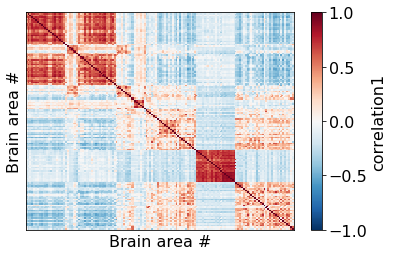

In [20]:
df_mean_subtracted1 = df1.sub(df_Exp.mean(axis=1),axis=0)
df_mean_subtracted2 = df2.sub(df_Exp.mean(axis=1),axis=0)
df_mean_subtracted3 = df3.sub(df_Exp.mean(axis=1),axis=0)
df_mean_subtracted4 = df4.sub(df_Exp.mean(axis=1),axis=0)
df_mean_subtracted5 = df5.sub(df_Exp.mean(axis=1),axis=0)
df_mean_subtracted6 = df6.sub(df_Exp.mean(axis=1),axis=0)
info['correlation1'] = df_mean_subtracted1.corr().values
info['correlation2'] = df_mean_subtracted2.corr().values
info['correlation3'] = df_mean_subtracted3.corr().values
info['correlation4'] = df_mean_subtracted4.corr().values
info['correlation5'] = df_mean_subtracted5.corr().values
info['correlation6'] = df_mean_subtracted6.corr().values
summarize(info,'correlation1',quiet=True)
plt.xlabel('Brain area #')
plt.ylabel('Brain area #');

In [21]:
def my_dendrogram(features,color_threshold,truncate_mode=None,labels=None,no_labels=False,leaf_font_size=20):
    plt.figure(figsize=(44,14))
    Z = linkage(features,method='ward')
    Z[:,2] = Z[:,2]**0.25 # Warp distance for visualization purposes
    dendrogram(
        Z,
        truncate_mode=truncate_mode,  # show only the last p merged clusters
        p=25,  # show only the last p merged clusters
        color_threshold=color_threshold,
        above_threshold_color='black',
        leaf_font_size=leaf_font_size,
        labels=labels,
        no_labels=no_labels,
        #orientation='right'
    );
    plt.ylabel('Intercluster distance')
    if not no_labels:
        plt.xlabel('Cluster sizes');

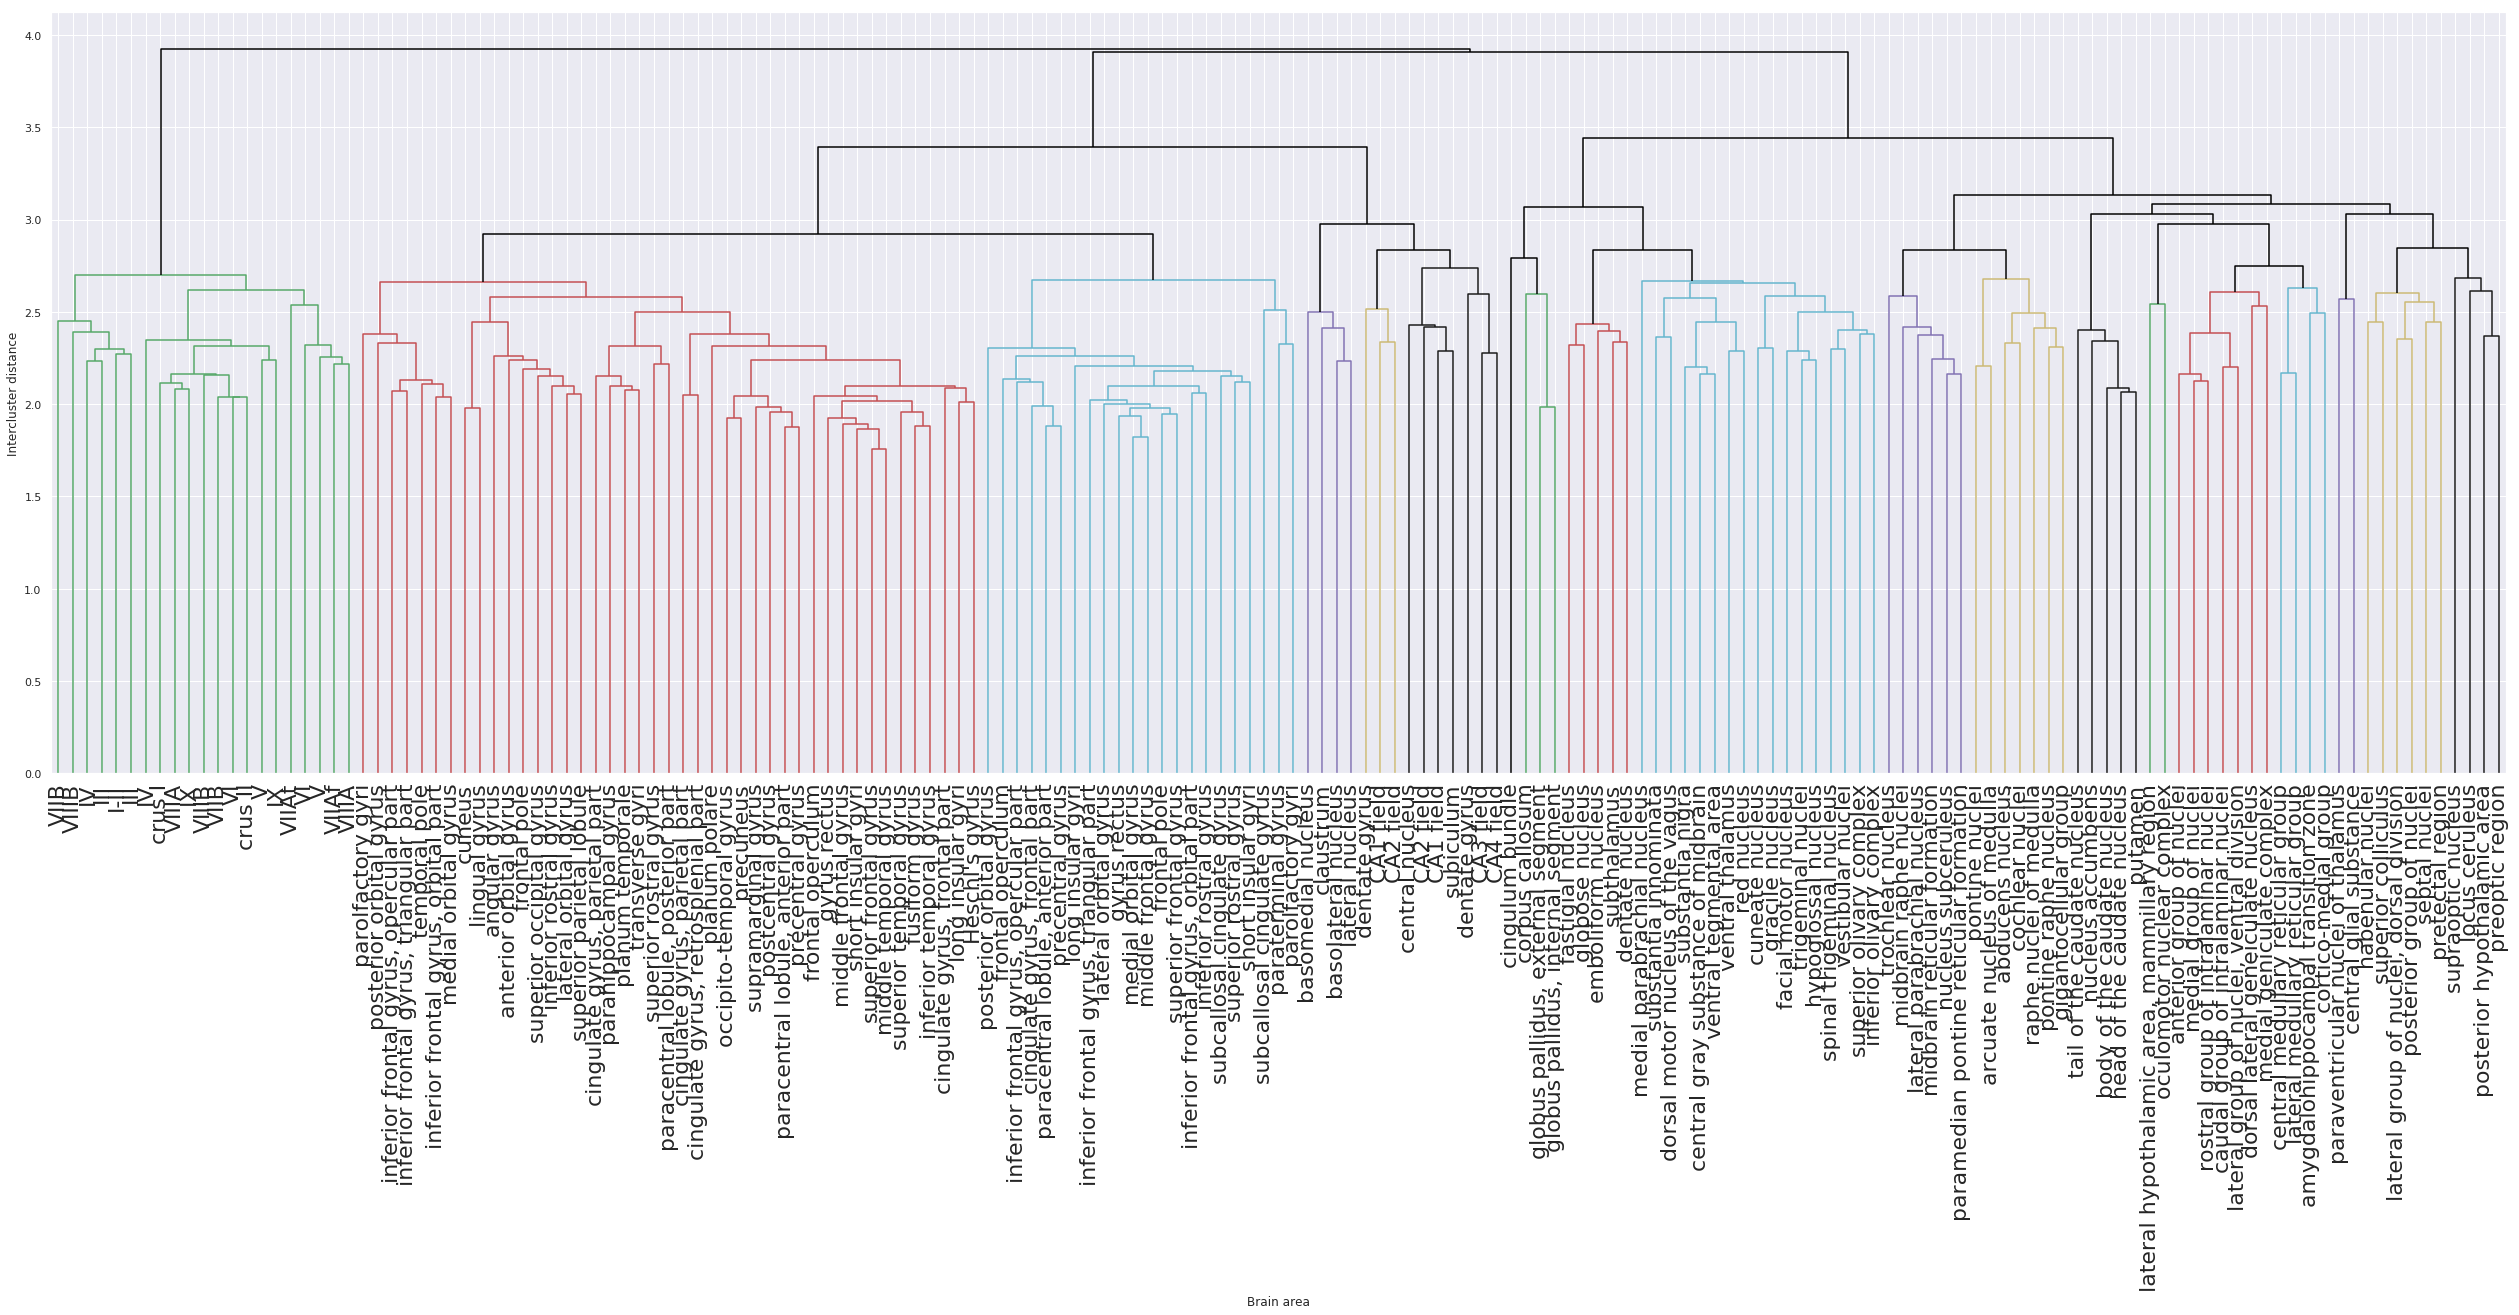

In [360]:
my_dendrogram(df_mean_subtracted1.T,None,labels=df1.columns,leaf_font_size=22)
plt.xlabel('Brain area');

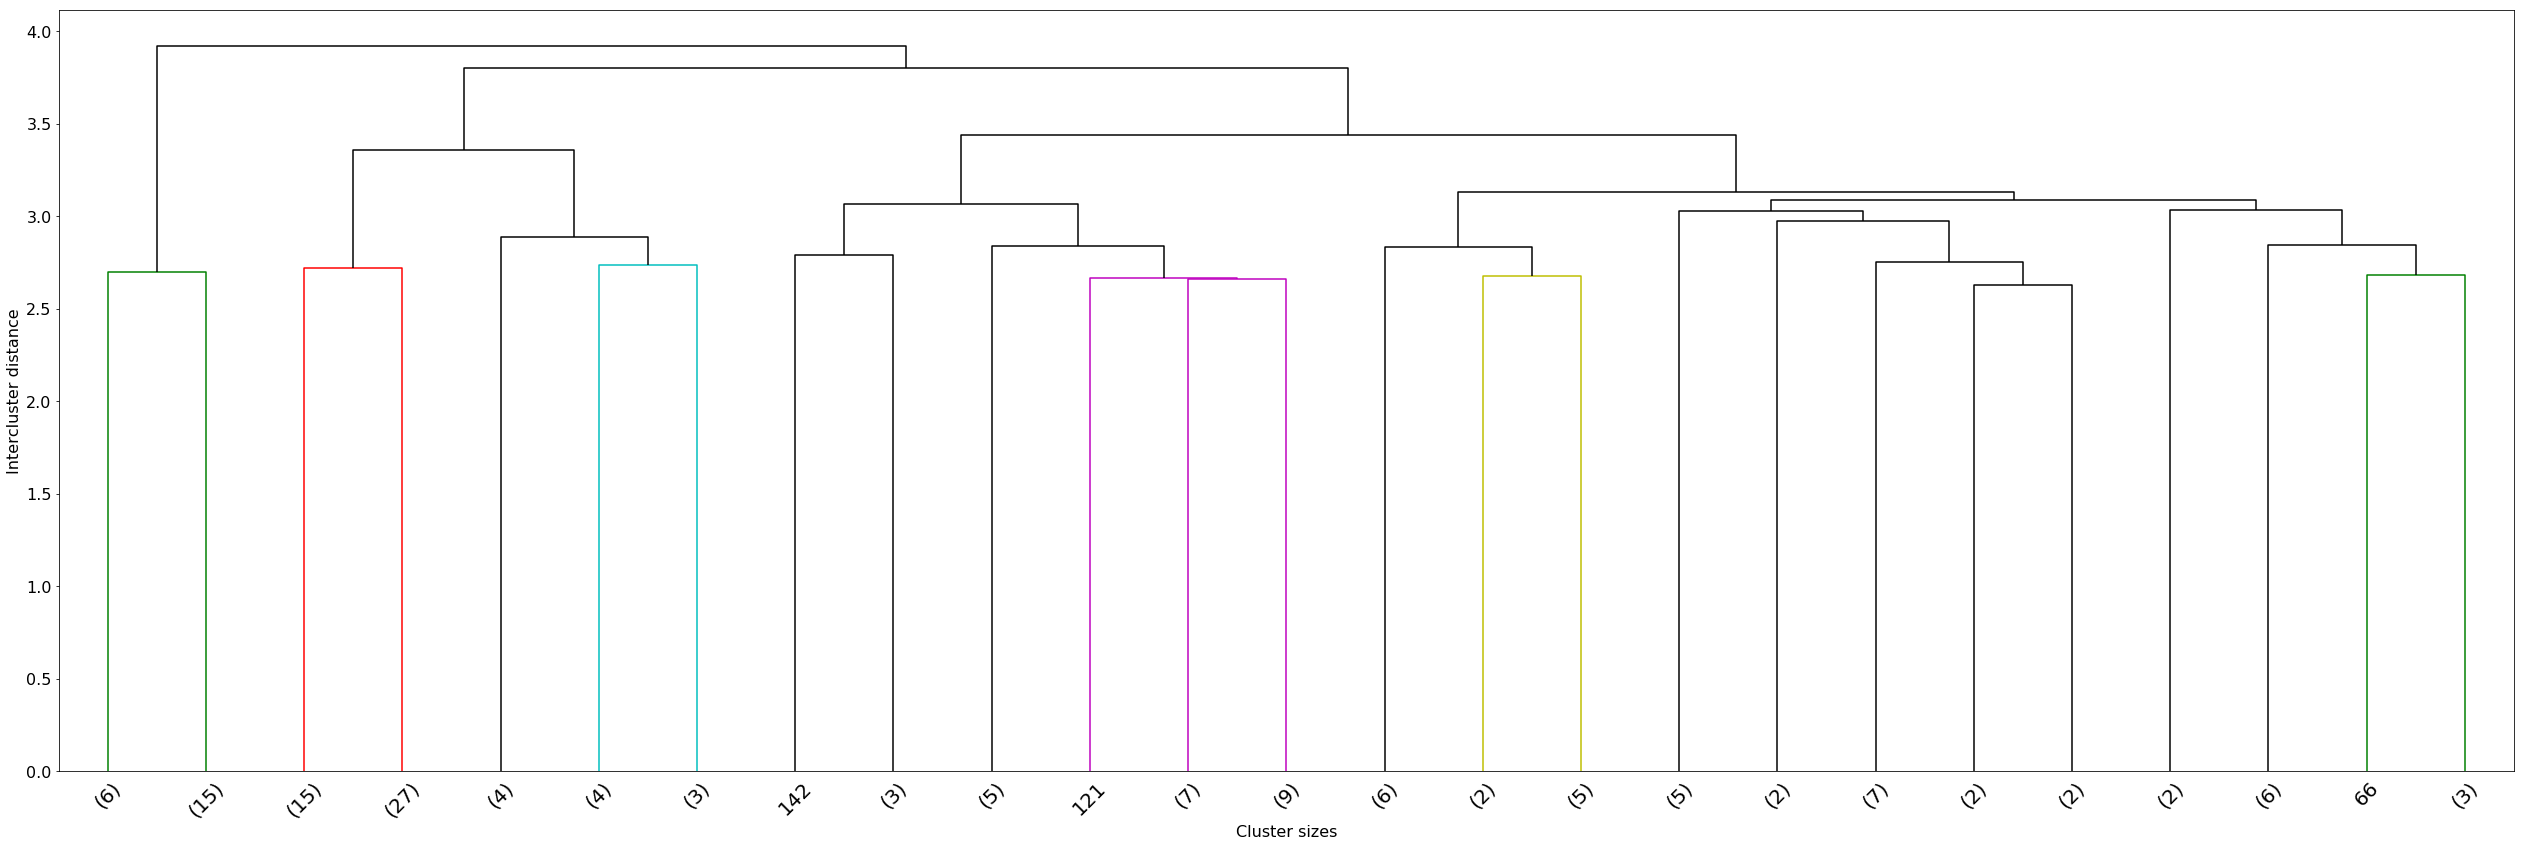

In [22]:
my_dendrogram(df_mean_subtracted1.T,None,truncate_mode='lastp')

In [23]:
import seaborn as sns
sns.set()

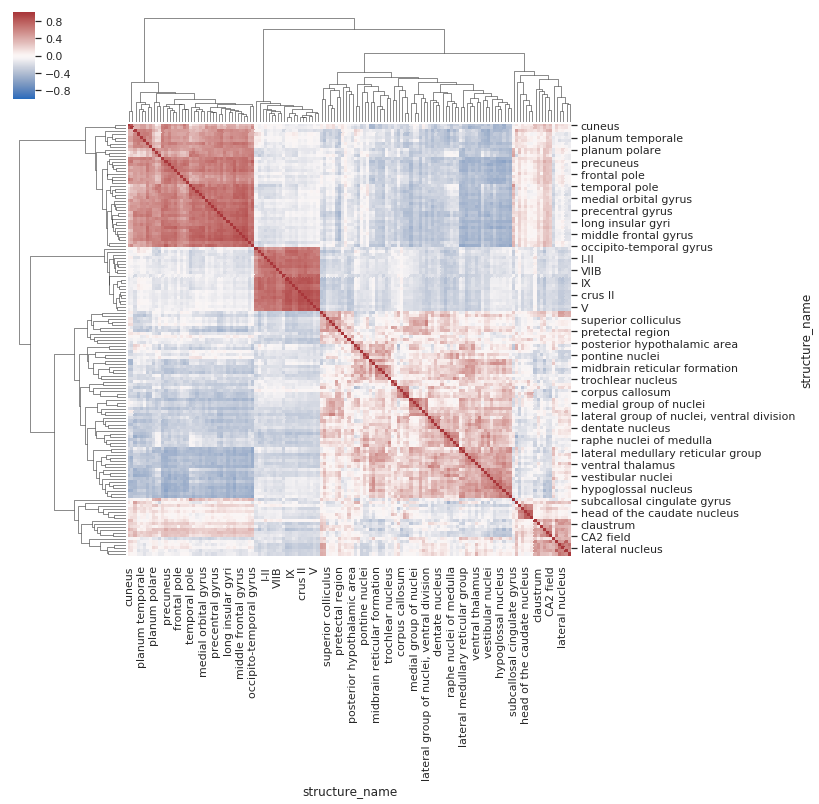

In [24]:
sns.clustermap(df1.corr(),cmap='vlag',vmin=-1,vmax=1);

In [25]:
df6.shape

(1149, 153)

In [26]:
df_Pro= pd.read_csv('Probes.csv')
gene=df_Pro['gene-name']
gene = df1.set_index(gene)

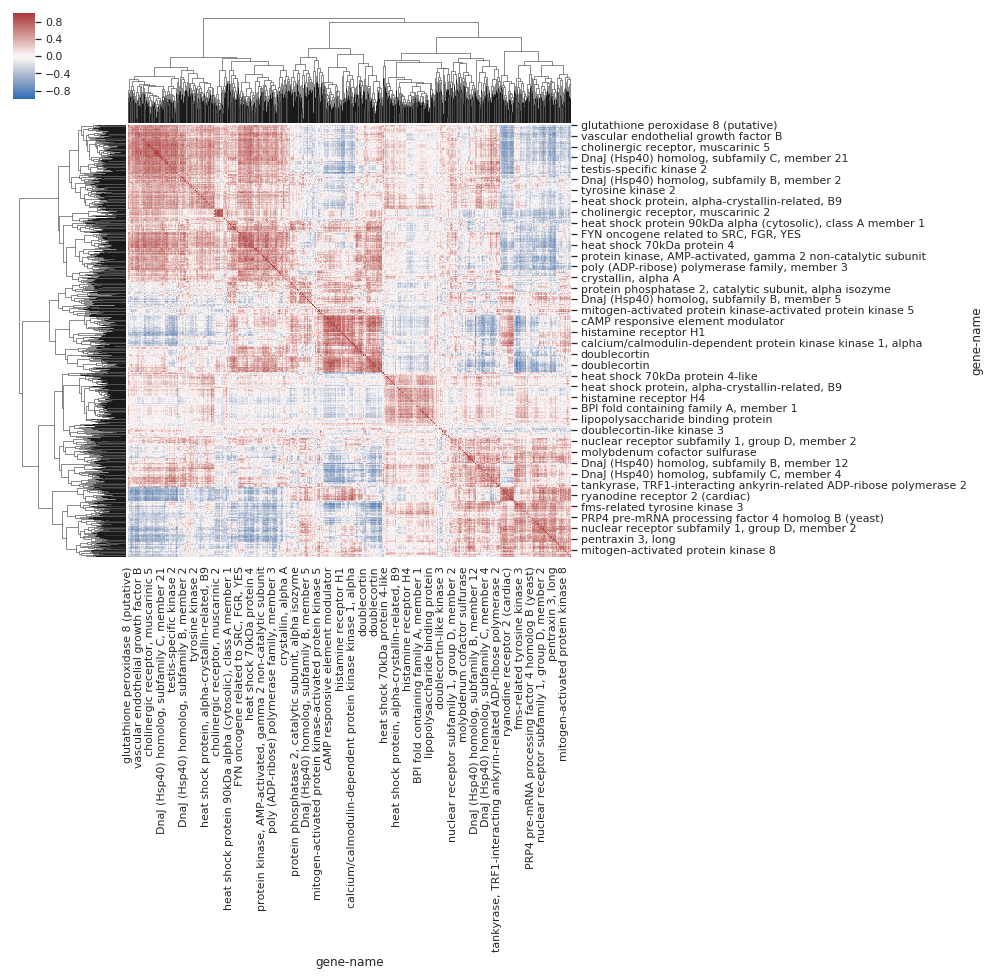

In [27]:
sns.clustermap(gene.iloc[:,:].T.corr(),cmap='vlag',vmin=-1,vmax=1);

In [28]:
df6

structure_name,anterior orbital gyrus,frontal operculum,gyrus rectus,"inferior frontal gyrus, opercular part","inferior frontal gyrus, orbital part","inferior frontal gyrus, triangular part",inferior rostral gyrus,lateral orbital gyrus,medial orbital gyrus,middle frontal gyrus,...,dorsal motor nucleus of the vagus,hypoglossal nucleus,inferior olivary complex,gigantocellular group,lateral medullary reticular group,raphe nuclei of medulla,spinal trigeminal nucleus,vestibular nuclei,corpus callosum,choroid plexus of the lateral ventricle
Probe ID,,,,,,,,,,,,,,,,,,,,,
1028929,-0.6409,-1.2526,-0.8514,-1.0307,-0.9231,-1.1568,-1.1614,-0.7576,-0.7795,-0.8073,...,1.2457,0.6773,1.5734,0.8803,0.9659,0.0952,1.1117,0.6702,0.6888,1.9745
1028930,-0.4922,-0.8325,-0.7446,-0.5159,0.2168,-0.5769,-0.8601,0.0769,-0.0609,-0.1047,...,-0.0490,-1.9886,-0.2166,0.3736,0.5566,-0.0743,0.9830,-0.0236,0.4204,1.8188
1048348,0.1594,-0.7170,-0.1315,-0.1859,-0.3915,-0.3193,0.4295,0.1205,0.4259,0.1735,...,-1.2666,-0.1918,-0.4613,0.0338,-0.5328,-0.0354,0.0003,-1.3600,0.4436,-1.0792
1048598,-0.6024,-0.6568,-0.6541,-0.3857,-0.2080,-0.4104,-0.5146,-0.2856,-0.6318,-0.2093,...,1.6352,1.8394,3.1060,1.5451,2.0047,0.7505,1.3084,2.0124,-0.0612,-1.0464
1048599,-0.8446,-0.6134,-0.7396,-0.5210,-0.2164,-0.4881,-0.5652,-0.5430,-0.7015,-0.2256,...,1.4381,1.6621,2.8474,1.3824,2.0222,0.5386,1.2299,2.0091,-0.2492,-0.9855
1015836,-0.4180,-0.2824,-0.3968,0.1244,0.7560,-0.2343,-0.0620,0.0717,-0.2979,0.1692,...,-0.2896,-0.7902,-1.5570,0.2114,1.0990,-0.6473,0.4441,0.4970,-6.8726,-5.8911
1014329,-0.5512,-0.5659,-1.1388,0.2817,0.2400,-0.5671,-0.8644,-0.2149,-0.3240,-0.1095,...,-1.3786,-1.9989,-2.5322,0.9168,-2.6349,0.4840,-1.0798,0.6779,-0.1467,-1.3697
1014097,-1.2152,-0.7418,-0.6251,-1.1267,0.1608,-0.6881,-0.8560,-0.7907,-0.9696,-0.9388,...,0.5669,0.2716,1.5446,0.6101,1.7434,-0.2362,0.9698,1.1864,-1.3334,0.0278
1039920,0.8056,0.5744,0.5281,0.4231,1.1292,0.5346,0.4191,0.6254,0.8933,0.5871,...,-0.3880,1.1042,0.7956,0.4823,-0.4046,0.0908,1.0388,0.3182,-2.0642,-1.7448


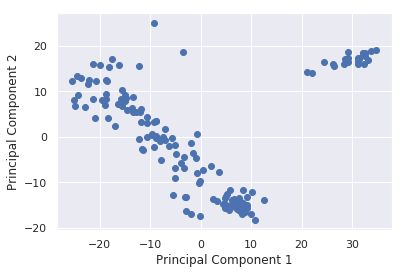

In [44]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df6.T)
plt.scatter(pca_features[:,0],pca_features[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

In [46]:
df_pca = pd.DataFrame(pca_features, index=df6.columns)
df_pca[df_pca[0]<-10].head()

,0,1
structure_name,,
substantia innominata,-11.595819,-2.601344
"globus pallidus, external segment",-17.591942,17.105503
"globus pallidus, internal segment",-12.318195,15.561944
claustrum,-11.428379,-2.994600
habenular nuclei,-18.816266,12.582581


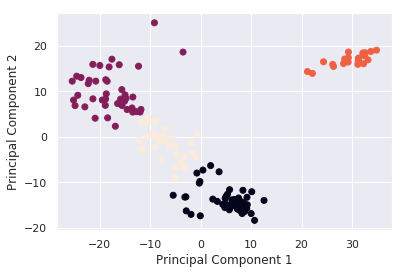

In [45]:
kmeans = KMeans(n_clusters=4)
n_components = 3
kmeans.fit(pca_features)
plt.scatter(pca_features[:,0],pca_features[:,1],c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

In [306]:
kmeans.labels_.shape

(169,)

In [292]:
list(df1.columns[kmeans.labels_==4])

['frontal operculum',
 'frontal pole',
 'inferior frontal gyrus, opercular part',
 'inferior frontal gyrus, orbital part',
 'lateral orbital gyrus',
 'middle frontal gyrus',
 'paracentral lobule, anterior part',
 'parolfactory gyri',
 'posterior orbital gyrus',
 'superior frontal gyrus',
 'superior rostral gyrus',
 'short insular gyri',
 'cingulate gyrus, frontal part',
 'subcallosal cingulate gyrus',
 'CA1 field',
 'CA2 field',
 'CA3 field',
 'parahippocampal gyrus',
 'lingual gyrus',
 'postcentral gyrus',
 'superior parietal lobule',
 "Heschl's gyrus",
 'planum temporale',
 'substantia innominata',
 'globus pallidus, external segment',
 'globus pallidus, internal segment',
 'body of the caudate nucleus',
 'head of the caudate nucleus',
 'tail of the caudate nucleus',
 'putamen',
 'claustrum',
 'habenular nuclei',
 'paraventricular nuclei of thalamus',
 'VI',
 'VIIB',
 'arcuate nucleus of medulla',
 'central glial substance',
 'cochlear nuclei',
 'dorsal motor nucleus of the vagus',
 